# Lab Feedback 07

Here are some suggested solutions for the exercises for this week's practical session. Note that these aren't the only - or indeed necessarily the "best" - solutions.

## Exercise 1 

### 1. Load the data


In [1]:
import pandas as pd
census_df = pd.read_csv('censusCrimeClean.csv')
census_df

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.00,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.00,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.00,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.00,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.00,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,TempleTerracecity,10,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.00,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.09
1990,Seasidecity,10,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.00,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.45
1991,Waterburytown,10,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.02,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.23
1992,Walthamcity,10,0.08,0.51,0.06,0.87,0.22,0.10,0.58,0.74,...,0.01,0.45,0.64,0.54,0.59,0.52,0.03,0.38,0.33,0.19


In [2]:
### 2. Extract all but the first column

In [3]:
#store data without the first column (because it's text)
features = census_df.iloc[:,1:]

### 3. Create and fit PCA with two components

In [4]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

features = census_df.iloc[:,1:]
#You may wish to standardise
#features=preprocessing.scale(features)

# Create and fit a PCA model
pca = PCA(n_components=2)

pca.fit(features)

PCA(n_components=2)

### 4. Look at the `explained_variance_ratio_`

In [5]:
# Look at the component loadings. 
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[8.26130789 1.08655844]
[0.67387831 0.08863102]


The first component captures 67% of the variance. That's not bad for one variable! The second component captures very little. That's a bit suspicous, because it suggests that all the many of the variables are covariant. Let's plot them and look at the loadings.

### 5. Transform the data into the principal components and plot

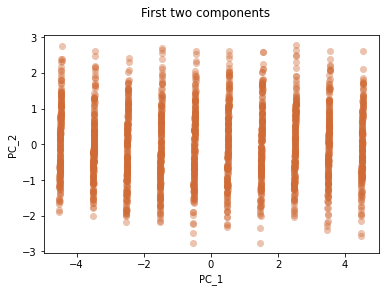

In [6]:
from matplotlib import pyplot as plt

# project the features into these principle components
projectedAxes = pca.transform(features)

plt.figure(1)
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projectedAxes[:,0], projectedAxes[:,1], c = "#D06B36", s = 50, alpha = 0.4, linewidth=0)

Looks distinctly weird! This often happens when a categorical or highly structure variable is included in the mix. Component 1 looks like it's dominated by a discrete variable. Let's look at the loadings to investigate further.

### 6. Look at the loadings

In [7]:
loadings=pd.DataFrame(pca.components_,columns=census_df.columns.values[1:])
loadings=loadings.transpose()
loadings=loadings.abs()
loadings=loadings.sort_values(by =0,ascending=False)
print(loadings)

                       0         1
fold            0.999788  0.016430
pctUrban        0.004944  0.146079
PctOccupManu    0.004403  0.132659
RentHighQ       0.004078  0.188187
medIncome       0.003932  0.185649
...                  ...       ...
PctForeignBorn  0.000076  0.024639
racepctblack    0.000066  0.130905
racePctAsian    0.000064  0.061561
PctUsePubTrans  0.000037  0.036078
racePctHisp     0.000002  0.064135

[101 rows x 2 columns]


One variable dominates: `fold`

(array([200.,   0., 200.,   0., 200.,   0., 200.,   0., 199.,   0.,   0.,
        199.,   0., 199.,   0., 199.,   0., 199.,   0., 199.]),
 array([ 1.  ,  1.45,  1.9 ,  2.35,  2.8 ,  3.25,  3.7 ,  4.15,  4.6 ,
         5.05,  5.5 ,  5.95,  6.4 ,  6.85,  7.3 ,  7.75,  8.2 ,  8.65,
         9.1 ,  9.55, 10.  ]),
 <BarContainer object of 20 artists>)

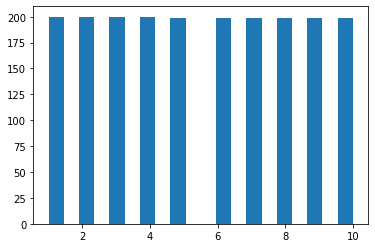

In [8]:
plt.hist(census_df['fold'],bins=20)

This is clearly a rogue variable that isn't really a census variable. So let's drop it.

### 7. Repeat with the variable removed

[1.0884979  0.75511529]
[0.27204086 0.18872082]
                         0         1
PctHousNoPhone    0.197953  0.011821
PctPopUnderPov    0.190608  0.031635
RentHighQ         0.188423  0.136248
medIncome         0.185822  0.040774
PctYoungKids2Par  0.178807  0.017237
...                    ...       ...
pctWRetire        0.005575  0.068609
PctRecImmig8      0.002027  0.255064
PctRecentImmig    0.001797  0.248239
PctRecImmig5      0.000901  0.252463
PctRecImmig10     0.000556  0.253476

[100 rows x 2 columns]


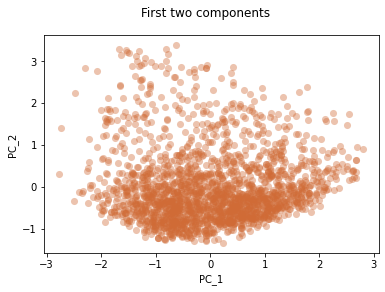

In [9]:
features = census_df.iloc[:,2:]
#You may wish to standardise
#features=preprocessing.scale(features)

# Create and fit a PCA model
pca = PCA(n_components=2)

pca.fit(features)

# Look at the component loadings. 
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

# project the features into these principle components
projectedAxes = pca.transform(features)

plt.figure(1)
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projectedAxes[:,0], projectedAxes[:,1], c = "#D06B36", s = 50, alpha = 0.4, linewidth=0)

loadings=pd.DataFrame(pca.components_,columns=census_df.columns.values[2:])
loadings=loadings.transpose()
loadings=loadings.abs()
loadings=loadings.sort_values(by =0,ascending=False)
print(loadings)

This PCA looks more like as we would expect. The previous one was totally dominated by a discrete variable that was just an artefact of our data. We explain much less of the variation now, but the variation is better spread between the two principal components.

### 8. Colour the points by `ViolentCrimesPerPop`

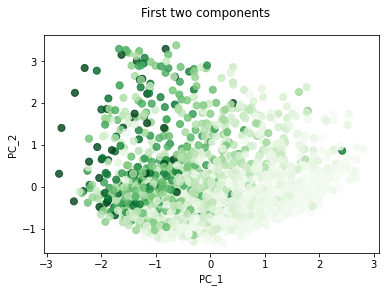

In [10]:
plt.figure(1)
plt.suptitle('First two components')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.scatter(projectedAxes[:,0], projectedAxes[:,1], c = census_df['ViolentCrimesPerPop'], cmap = plt.cm.Greens, s = 50, alpha = 0.8)


The first principle component seems to broadly distinguish areas with high crime, so the loadings on the first component are likely to be discriminating of this.

However, as mentioned this is not a great way to analyse crime, we just consider it as a by-product of what we have done.

## Exercise 2: Multidimensional scaling

### 1. Load the data and extract the numerical features

In [11]:
import pandas as pd

londonBorough= pd.read_excel('london-borough-profilesV2.xlsx')

### 2. Extract numerical features and prepare

After extracting numerical features, fill the remaining NANs with the mean - this seems reasonable. Centralise.

In [12]:
# get features we want to use
# since the data is problematic and the missing values are 
# represented with all sorts of strange characters, let's
# force everything to be converted into number which
# will turn problematic values NAN
londonBorough_feat = londonBorough.apply(pd.to_numeric, errors='coerce')
londonBorough_feat = londonBorough_feat.dropna(axis=1, how='all')

print(londonBorough.shape)
print(londonBorough_feat.shape)

# fill the missing values with mean()
londonBorough_feat = londonBorough_feat.fillna(londonBorough_feat.mean())
# centralise
londonBorough_feat -= londonBorough_feat.mean()


(38, 76)
(38, 69)


### 3. Calculate a similarity matrix


Calculate the a distance/simility matrix in a high-dimensional data space. We are using Euclidean distance, but we could use anything. Remember the "Curse of Dimensionality", too many features may result in distance values that aren't very discriminating.

In [13]:
from sklearn.metrics import euclidean_distances

# compute the euclidean distances between the columns by passing the same data twice
# the resulting data matrix now has the pairwise distances between the boroughs
distMatrix = euclidean_distances(londonBorough_feat, londonBorough_feat)

distMatrix.shape

(38, 38)

### 4. Perform MDS and transform the data into it

In [14]:
from sklearn import manifold

#Create an MDS
mds = manifold.MDS(n_components = 2, max_iter=3000, n_init=1, dissimilarity="precomputed")

#project the data
Y = mds.fit_transform(distMatrix)

### 5. Plot

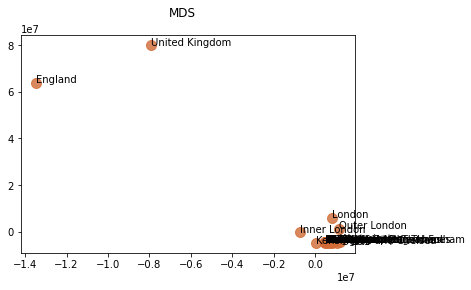

In [15]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()
plt.suptitle('MDS')
ax.scatter(Y[:, 0], Y[:, 1], c="#D06B36", s = 100, alpha = 0.8)

for i, txt in enumerate(londonBorough["Area/INDICATOR"]):
    ax.annotate(txt, (Y[:, 0][i],Y[:, 1][i]))

The aggregate areas are unsurprisingly very different and dominate, so let's remove

### 6. Filter aggregate rows ("boroughs")

We repeat everything, but exclude the last 5.

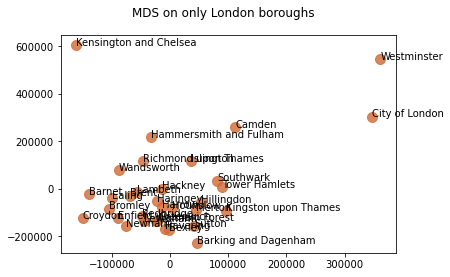

In [16]:
import pandas as pd

#exclude the last 5 rows
londonBorough= pd.read_excel('london-borough-profilesV2.xlsx').iloc[:-5,:]

#get features we want to use
londonBorough_feat = londonBorough.apply(pd.to_numeric, errors='coerce')
londonBorough_feat = londonBorough_feat.dropna(axis=1, how='all')

# fill the missing values with mean()
londonBorough_feat = londonBorough_feat.fillna(londonBorough_feat.mean())
# centralise
londonBorough_feat -= londonBorough_feat.mean()

distMatrix = euclidean_distances(londonBorough_feat, londonBorough_feat)

#Create an MDS
mds = manifold.MDS(n_components = 2, max_iter=3000, n_init=1, dissimilarity="precomputed")

#project the data
Y = mds.fit_transform(distMatrix)

fig, ax = plt.subplots()
plt.suptitle('MDS on only London boroughs')
ax.scatter(Y[:, 0], Y[:, 1], c="#D06B36", s = 100, alpha = 0.8)

for i, txt in enumerate(londonBorough["Area/INDICATOR"]):
    ax.annotate(txt, (Y[:, 0][i],Y[:, 1][i]))

Can see more discrimation. Two seem more different than the rest. But what is this "similarity" based on? It's *important* that we don't just use everything when doing analysis! Think about what you want to find out.


### 6. Choose features that represent (for example) emotional well-being.

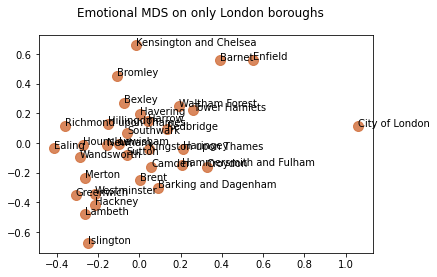

In [17]:
londonBorough_emotionfeat = londonBorough_feat[["Life satisfaction score 2012-13 (out of 10)", "Worthwhileness score 2012-13 (out of 10)","Happiness score 2012-13 (out of 10)","Anxiety score 2012-13 (out of 10)"]]

distMatrix = euclidean_distances(londonBorough_emotionfeat, londonBorough_emotionfeat)

#Create an MDS
mds = manifold.MDS(n_components = 2, max_iter=3000, n_init=1, dissimilarity="precomputed")

#project the data
Y = mds.fit_transform(distMatrix)

fig, ax = plt.subplots()
plt.suptitle('Emotional MDS on only London boroughs')
ax.scatter(Y[:, 0], Y[:, 1], c="#D06B36", s = 100, alpha = 0.8)

for i, txt in enumerate(londonBorough["Area/INDICATOR"]):
    ax.annotate(txt, (Y[:, 0][i],Y[:, 1][i]))

The City of London is very different, probably because almost no one lives there - just banks and offices.

See [The Information Capital](http://www.oliveruberti.com/the-information-capital) (which has a bit of giCentre input) with some lovely examples of interesting perspectives on London. See "Islington has Issues".

## Exercise 3. Clustering wines

We ignore the known labels and do k-mean clustering on everything else.

### 1. Loading wine data

In [18]:
import pandas as pd

winePD = pd.read_csv('wine.csv')
print (winePD.head())

# get all the data but not the class labels
features = winePD.iloc[:,1:]
knownLabels=winePD.iloc[:,0]

   Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline   
0             5.64  1.04                          3.92 

### 2. Cluster into 3 clusters

In [19]:
from sklearn.cluster import KMeans

#computing K-Means with K = 3 (3 clusters)
kmeansModel = KMeans(init='random', n_clusters=3, n_init=10)
kmeansModel.fit_predict(features)
clusterLabels = kmeansModel.labels_

### 3. Compare the classes

But NOTE even though they have the same names, they *don't correspond to each other*.

In [20]:
for i, clustLabel in enumerate(clusterLabels):
    print("Cluster result: ", clustLabel, " Known labels: ",knownLabels[i])

Cluster result:  1  Known labels:  1
Cluster result:  1  Known labels:  1
Cluster result:  1  Known labels:  1
Cluster result:  1  Known labels:  1
Cluster result:  0  Known labels:  1
Cluster result:  1  Known labels:  1
Cluster result:  1  Known labels:  1
Cluster result:  1  Known labels:  1
Cluster result:  1  Known labels:  1
Cluster result:  1  Known labels:  1
Cluster result:  1  Known labels:  1
Cluster result:  1  Known labels:  1
Cluster result:  1  Known labels:  1
Cluster result:  1  Known labels:  1
Cluster result:  1  Known labels:  1
Cluster result:  1  Known labels:  1
Cluster result:  1  Known labels:  1
Cluster result:  1  Known labels:  1
Cluster result:  1  Known labels:  1
Cluster result:  0  Known labels:  1
Cluster result:  0  Known labels:  1
Cluster result:  0  Known labels:  1
Cluster result:  1  Known labels:  1
Cluster result:  1  Known labels:  1
Cluster result:  0  Known labels:  1
Cluster result:  0  Known labels:  1
Cluster result:  1  Known labels:  1
C

### 4. Plot as a scatter plot coloured by the labels

More effective is to plot the wines in a scatterplot using a suitable layout and using the same layouts for colouring both class. It would be better practice to use different hues to reenforce the fact that these categories at NOT equivalent.

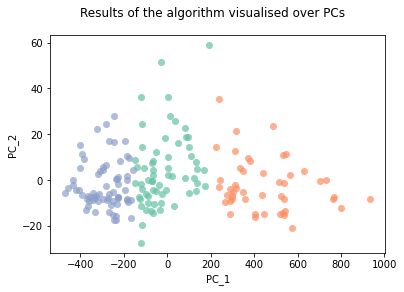

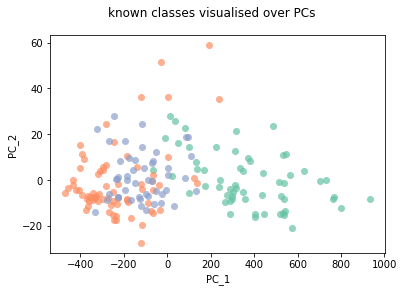

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# We first fit a PCA model to the data
pca.fit(features)

# have a look at the components directly if we can notice any interesting structure
projectedAxes = pca.transform(features)
projectedAxes=pd.DataFrame(projectedAxes) #put into a dataframe so easier to filter

plt.figure(1)
plt.suptitle('Results of the algorithm visualised over PCs')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
#draw 3 scatterplots on top of each other, using a different colour for each
plt.scatter(projectedAxes[clusterLabels==0][0], projectedAxes[clusterLabels==0][1], c = "#66c2a5", s = 50, alpha = 0.7, linewidth=0) # greenish
plt.scatter(projectedAxes[clusterLabels==1][0], projectedAxes[clusterLabels==1][1], c = "#fc8d62", s = 50, alpha = 0.7, linewidth=0) # orangish
plt.scatter(projectedAxes[clusterLabels==2][0], projectedAxes[clusterLabels==2][1], c = "#8da0cb", s = 50, alpha = 0.7, linewidth=0) # blueish
plt.show()

plt.figure(1)
plt.suptitle('known classes visualised over PCs')
plt.xlabel('PC_1')
plt.ylabel('PC_2')
#draw 3 scatterplots on top of each other, using a different colour for each
plt.scatter(projectedAxes[knownLabels==1][0], projectedAxes[knownLabels==1][1], c = "#66c2a5", s = 50, alpha = 0.7, linewidth=0) # greenish
plt.scatter(projectedAxes[knownLabels==2][0], projectedAxes[knownLabels==2][1], c = "#fc8d62", s = 50, alpha = 0.7, linewidth=0) # orangish
plt.scatter(projectedAxes[knownLabels==3][0], projectedAxes[knownLabels==3][1], c = "#8da0cb", s = 50, alpha = 0.7, linewidth=0) # blueish
plt.show()



### 5. Optional: find the features that can explain the known labels

_I've not tried this yet_

## Exercise 4: Cross-validation

In [22]:
import pandas as pd

census = pd.read_csv('censusCrimeClean.csv')

dependent = census["ViolentCrimesPerPop"]
independent=census["medIncome"];

For each fold, we build a model, report its parameters, plot it and look at the residuals with the original model.

-------- Run:  0
Slope:  -0.48689301053023804 Intercept:  0.41494657121383316 r_value:  -0.43953219832269624 p_value:  2.5152563277256004e-76 std_err:  0.02492992561362188
Average residuals 0.16314937192418666
-------- Run:  1
Slope:  -0.46290250039599223 Intercept:  0.4022514782800472 r_value:  -0.42848486139035585 p_value:  3.1526010764865266e-72 std_err:  0.02445669945318979
Average residuals 0.17182883396171614
-------- Run:  2
Slope:  -0.46524538327651577 Intercept:  0.4056395405660243 r_value:  -0.4159804687564906 p_value:  9.055463359508946e-68 std_err:  0.025482589694579526
Average residuals 0.15447263744694253
-------- Run:  3
Slope:  -0.4696838774913178 Intercept:  0.4082131381003272 r_value:  -0.41271585848226755 p_value:  1.230583291828244e-66 std_err:  0.025971567081218228
Average residuals 0.1461766430635283
-------- Run:  4
Slope:  -0.47486010671188844 Intercept:  0.41094480820201873 r_value:  -0.42391178352005027 p_value:  1.2819278082512543e-70 std_err:  0.025411603854

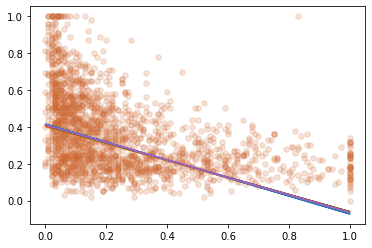

In [23]:
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
import scipy.stats as stats
import numpy as np

# generate sampling indices for 20 points and set the k to be 5 in this case, 5-fold cross validation
# You can use these to access your data accordingly
    
kf = KFold(n_splits=5)
foldCount = 0
plt.scatter(dependent,independent , c = "#D06B36", s = 30, alpha = 0.2)
for train_idxs, test_idxs in kf.split(census):
    #print(len(census),len(train_idxs),len(test_idxs))
    print("-------- Run: ", foldCount )
    dependentTrain = dependent[train_idxs]
    independentTrain = independent[train_idxs]
    dependentTest = dependent[test_idxs]
    independentTest = independent[test_idxs]

    # build a regression model and plot
    slope, intercept, r_value, p_value, std_err = stats.linregress(independentTrain, dependentTrain)
    predTrain  = independentTrain*slope + intercept
    plt.plot(independentTrain,predTrain)
    print ("Slope: ", slope, "Intercept: ", intercept, "r_value: ", r_value, "p_value: ", p_value,"std_err: ", std_err)

    # Use the regression models to estimate the unseen "medIncome" values 
    # given their ViolentCrimesPerPop values.
    predTest = slope * independentTest + intercept
    residuals = dependentTest - predTest
    #using the abs, so that +ve and -ve don't cancel each other out
    print ("Average residuals",np.average(residuals.abs()))
    foldCount += 1 
    
    

Visually, the scatterplot indicates that these variables are *not well correlated*. They also look like they have been *capped* at a particular value. The regression lines underestimate high dependent variable value, probably based on the low values. It's not a great model. 

Now let's consider the *regression parameters*. You already know how to interpret the slope and intercept. These don't change much between the k-folds and the regression lines all look similar. So this suggests that the model is not overfitting and seems to be generalisable to unseen data.

The *r-value( is the [correllation co-efficient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html), indicating a fairly low correlation of around -0.40. If you square this, you get the R2, which is around 0.16. This indicates that only 16% of the variation in crime can be explained by median income.

The *p-value* is for the null hypothesis that the slope is zero. If low, then we can reject the null hypothesis and suggesting that there is enough evidence that a non-zero slope exists in the population. However, these p-values are very high - way higher than the usual 0.05. This suggests that it's not a very meaningful addition to the model, because there is not enough evidence that that a non-zero slope would exist in the population.

Finally, when considering the residuals, consider the *effect size*. Is it within an acceptable range for your analysis? Here, we've used the absolute value so we don't get positives and negatives cancelling each other out. This variable has been normalised, but the residuals are quite high compared to the range. However, they quite consistent between k-folds